In [1]:
''' Pridicting Power generation because on Wind '''

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import glob
from datetime import datetime
%matplotlib inline


C:\ProgramData\Anaconda3\envs\tensorflow35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
''' Loading data '''
dataframe = pd.read_excel('AL_WIND_07_12.xlsx',index_col="DateTime")
dataframe.head()

,Air temperature | ('C),Pressure | (atm),Wind speed | (m/s),Wind direction | (deg),Power generated by system | (kW)
DateTime,,,,,
2007-01-01 00:00:00,10.926,0.979103,9.014,229,33688.1
2007-01-01 01:00:00,9.919,0.979566,9.428,232,37261.9
2007-01-01 02:00:00,8.567,0.979937,8.700,236,30502.9
2007-01-01 03:00:00,7.877,0.980053,8.481,247,28419.2
2007-01-01 04:00:00,7.259,0.979867,8.383,256,27370.3


In [3]:
''' Cleaning Data '''
dataframe['Power generated by system | (kW)'].replace(0, np.nan, inplace=True)
dataframe['Power generated by system | (kW)'].fillna(method='ffill', inplace=True)

In [4]:
''' Dividing data in test and train sets '''
dataset = dataframe.values
train_size = int(len(dataset) * 0.60)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

31536 21024


In [5]:
''' Helper to create time frames with look backs '''
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [6]:
''' Creating time frames with look backs '''
look_back = 8
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

31528
21016


In [7]:
''' Re-shaping data for model requirement '''
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
''' Fitting the data in LSTM Deep Learning model '''
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

In [9]:
''' Predicting 1 years data based on 5 years of previous data '''
yhat = model.predict(testX)

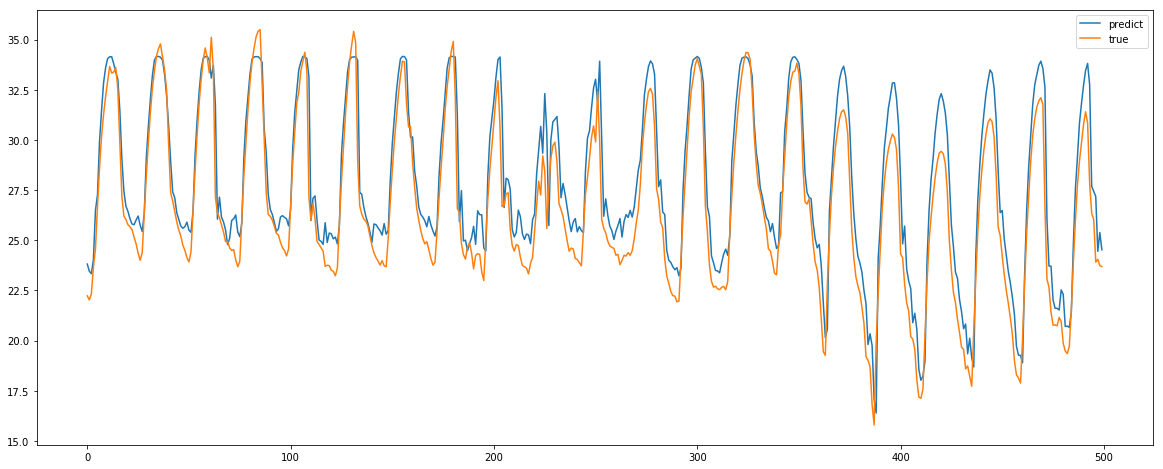

In [10]:
''' Plotting the first 500 entries to see prediction '''
pyplot.figure(figsize=(20,8))
pyplot.plot(yhat[:500], label='predict')
pyplot.plot(testY[:500], label='true')
pyplot.legend()
pyplot.show()

In [11]:
print("Mean squared error: %.3f" % mean_squared_error(testY, yhat))

Mean squared error: 2.778


In [12]:
print("Root mean squared error: %.3f" % sqrt(mean_squared_error(testY, yhat)))

Root mean squared error: 1.667


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
print('Variance : %.3f' % r2_score(testY, yhat))

Variance : 0.969


In [14]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.3f" % mean_absolute_error(testY, yhat))

Mean absolute error: 0.752
